## Introduction

Welcome to **CS188 - Data Science Fundamentals!** This course is designed to equip you with the tools and experiences necessary to start you off on a life-long exploration of datascience. We do not assume a prerequisite knowledge or experience in order to take the course. 

For this first project we will introduce you to the end-to-end process of doing a datascience project. Our goals for this project are to:

1. Familiarize you with the development environment for doing datascience
2. Get you comfortable with the python coding required to do datascience
3. Provide you with an sample end-to-end project to help you visualize the steps needed to complete a project on your own
4. Ask you to recreate a similar project on a separate dataset

In this project you will work through an example project end to end. Many of the concepts you will encounter will be unclear to you. That is OK! The course is designed to teach you these concepts in further detail. For now our focus is simply on having you replicate the code successfully and seeing a project through from start to finish. 

Here are the main steps:

1. Get the data
2. Visualize the data for insights
3. Preprocess the data for your machine learning algorithm
4. Select a model and train
5. Does it meet the requirements? Fine tune the model

![steps](images/MLprocess.jpg)



## Working with Real Data

It is best to experiment with real-data as opposed to aritifical datasets. 

There are many different open datasets depending on the type of problems you might be interested in!

Here are a few data repositories you could check out:
- [UCI Datasets](http://archive.ics.uci.edu/ml/)
- [Kaggle Datasets](kaggle.com)
- [AWS Datasets](https://registry.opendata.aws)


## Submission Instructions
When you have completed this assignment please save the notebook as a PDF file and submit the assignment via Gradescope


# Example Datascience Exercise
Below we will run through an California Housing example collected from the 1990's.

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 5) # python>=3.5
import sklearn
assert sklearn.__version__ >= "0.20" # sklearn >= 0.20

import numpy as np #numerical package in python
import os
%matplotlib inline
import matplotlib.pyplot as plt #plotting package

# to make this notebook's output identical at every run
np.random.seed(42)

#matplotlib magic for inline figures
%matplotlib inline 
import matplotlib # plotting library
import matplotlib.pyplot as plt

# Where to save the figures
ROOT_DIR = "."
IMAGES_PATH = os.path.join(ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    '''
        plt.savefig wrapper. refer to 
        https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
    '''
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [2]:
import os
import tarfile
import urllib
DATASET_PATH = os.path.join("datasets", "housing")

## Step 1. Getting the data

### Intro to Data Exploration Using Pandas

In this section we will load the dataset, and visualize different
features using different types of plots.

Packages we will use:
- **[Pandas](https://pandas.pydata.org):** is a fast, flexibile and expressive data structure widely used for tabular and multidimensional datasets.
- **[Matplotlib](https://matplotlib.org)**: is a 2d python plotting library which you can use to create quality figures (you can plot almost anything if you're willing to code it out!)
    - other plotting libraries:[seaborn](https://seaborn.pydata.org), [ggplot2](https://ggplot2.tidyverse.org)

In [3]:
import pandas as pd

def load_housing_data(housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data(DATASET_PATH) # we load the pandas dataframe
housing.head() # show the first few elements of the dataframe
               # typically this is the first thing you do
               # to see how the dataframe looks like

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


A dataset may have different types of features
- real valued
- Discrete (integers)
- categorical (strings)

The two categorical features are essentialy the same as you can always map a categorical string/character to an
integer. 

In the dataset example, all our features are real valued floats, except ocean proximity which is categorical.

In [5]:
# to see a concise summary of data types, null values, and counts
# use the info() method on the dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# you can access individual columns similarly
# to accessing elements in a python dict
housing["ocean_proximity"].head() # added head() to avoid printing many columns..

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object

In [7]:
# to access a particular row we can use iloc
housing.iloc[1]

longitude              -122.22
latitude                 37.86
housing_median_age          21
total_rooms               7099
total_bedrooms            1106
population                2401
households                1138
median_income           8.3014
median_house_value      358500
ocean_proximity       NEAR BAY
Name: 1, dtype: object

In [89]:
# one other function that might be useful is
# value_counts(), which counts the number of occurences
# for categorical features
housing["ocean_proximity"].value_counts()

NameError: name 'housing' is not defined

In [9]:
# The describe function compiles your typical statistics for each
# column
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### If you want to learn about different ways of accessing elements or other functions it's useful to check out the getting started section [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html)

## Step 2. Visualizing the data 

### Let's start visualizing the dataset

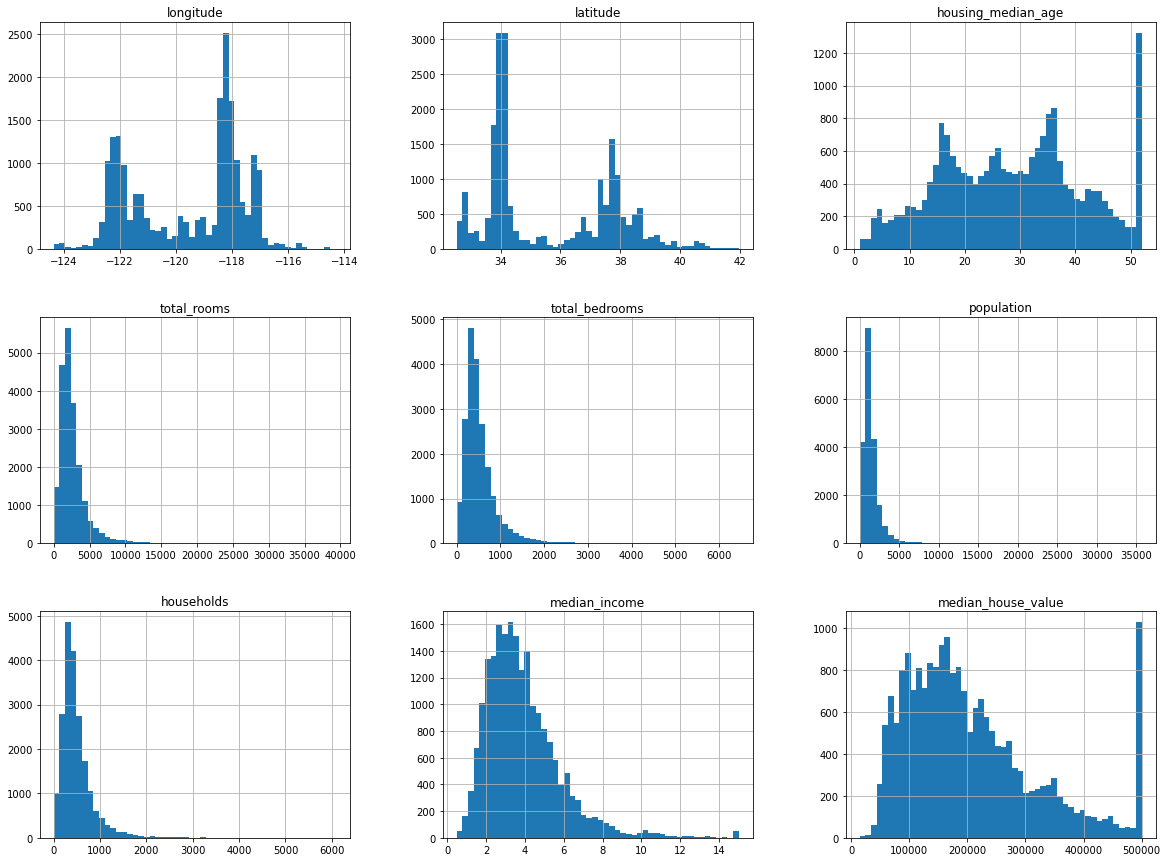

In [10]:
# We can draw a histogram for each of the dataframes features
# using the hist function
housing.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show() # pandas internally uses matplotlib, and to display all the figures
           # the show() function must be called

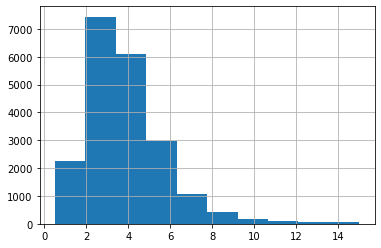

In [11]:
# if you want to have a histogram on an individual feature:
housing["median_income"].hist()
plt.show()

We can convert a floating point feature to a categorical feature
by binning or by defining a set of intervals. 

For example, to bin the 
households based on median_income we can use the pd.cut function

In [12]:
# assign each bin a categorical value [1, 2, 3, 4, 5] in this case.
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

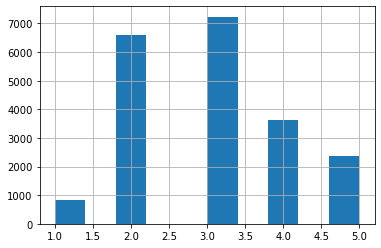

In [13]:
housing["income_cat"].hist()

#### Next let's visualize the household incomes based on latitude & longitude coordinates

Saving figure bad_visualization_plot


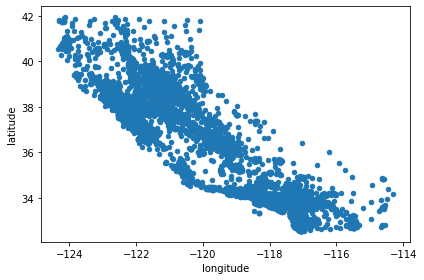

In [14]:
## here's a not so interestting way plotting it
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


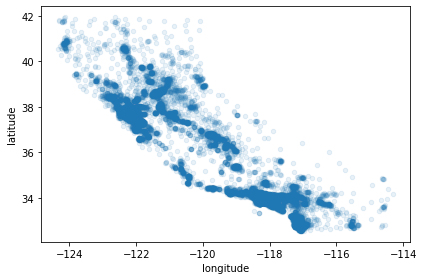

In [15]:
# we can make it look a bit nicer by using the alpha parameter, 
# it simply plots less dense areas lighter.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

<ipython-input-16-30a6f1a2327a>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


Saving figure california_housing_prices_plot


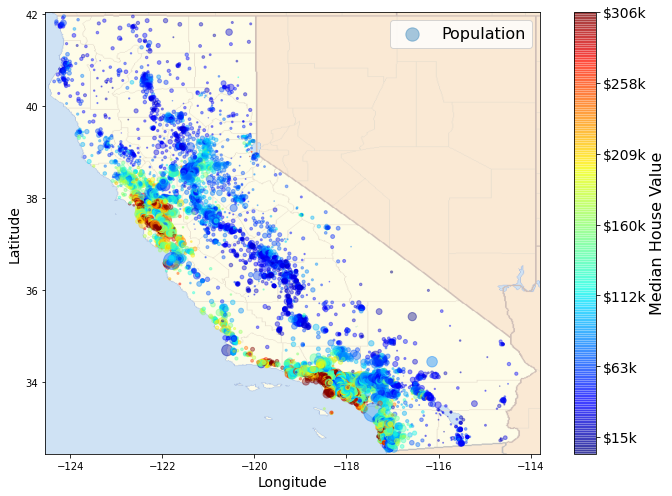

In [16]:
# A more interesting plot is to color code (heatmap) the dots
# based on income. The code below achieves this

# load an image of california
images_path = os.path.join('./', "images")
os.makedirs(images_path, exist_ok=True)
filename = "california.png"

import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
# overlay the califronia map on the plotted scatter plot
# note: plt.imshow still refers to the most recent figure
# that hasn't been plotted yet.
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# setting up heatmap colors based on median_house_value feature
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cb = plt.colorbar()
cb.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cb.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

Not suprisingly, we can see that the most expensive houses are concentrated around the San Francisco/Los Angeles areas.

Up until now we have only visualized feature histograms and basic statistics. 

When developing machine learning models the predictiveness of a feature for a particular target of intrest is what's important.

It may be that only a few features are useful for the target at hand, or features may need to be augmented by applying certain transfomrations. 

None the less we can explore this using correlation matrices.

In [17]:
corr_matrix = housing.corr()

In [18]:
# for example if the target is "median_house_value", most correlated features can be sorted
# which happens to be "median_income". This also intuitively makes sense.
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


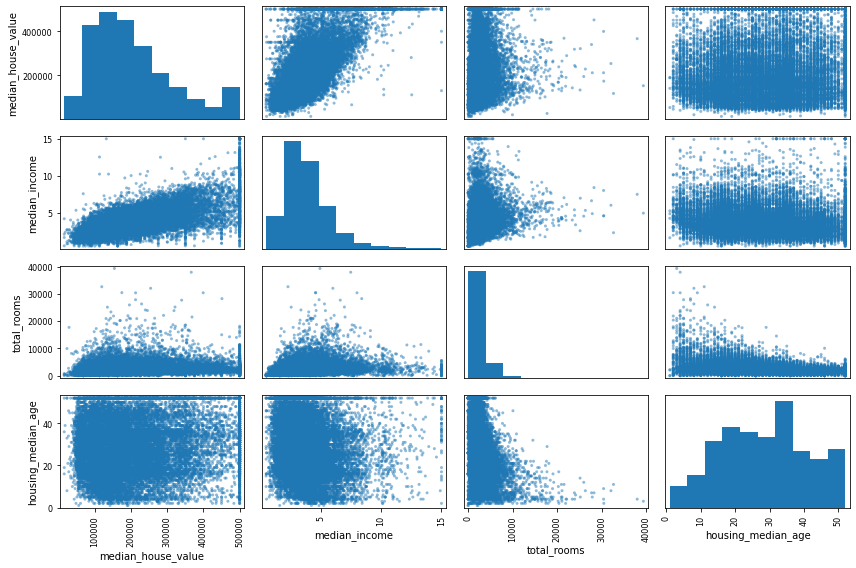

In [19]:
# the correlation matrix for different attributes/features can also be plotted
# some features may show a positive correlation/negative correlation or
# it may turn out to be completely random!
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


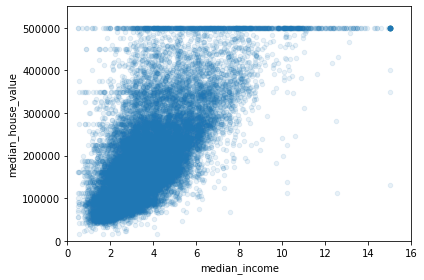

In [20]:
# median income vs median house vlue plot plot 2 in the first row of top figure
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

### Augmenting Features
New features can be created by combining different columns from our data set.

- rooms_per_household = total_rooms / households
- bedrooms_per_room = total_bedrooms / total_rooms
- etc.

In [21]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [22]:
# obtain new correlations
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

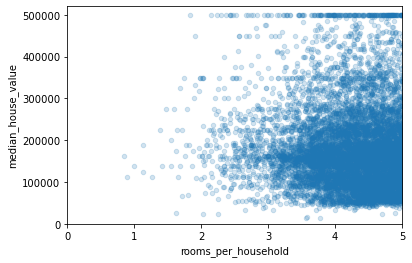

In [23]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [24]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Step 3. Preprocess the data for your machine learning algorithm

Once we've visualized the data, and have a certain understanding of how the data looks like. It's time to clean!

Most of your time will be spent on this step, although the datasets used in this project are relatively nice and clean... in the real world it could get real dirty.

After having cleaned your dataset you're aiming for:
- train set
- test set

In some cases you might also have a validation set as well for tuning hyperparameters (don't worry if you're not familiar with this term yet..)

In supervised learning setting your train set and test set should contain (**feature**, **target**) tuples. 
 - **feature**: is the input to your model
 - **target**: is the ground truth label
     - when target is categorical the task is a classification task
     - when target is floating point the task is a regression task
     
We will make use of **[scikit-learn](https://scikit-learn.org/stable/)** python package for preprocessing. 

Scikit learn is pretty well documented and if you get confused at any point simply look up the function/object!

### Dealing With Incomplete Data

In [25]:
# have you noticed when looking at the dataframe summary certain rows 
# contained null values? we can't just leave them as nulls and expect our
# model to handle them for us so we'll have to devise a method for dealing with them...
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,3,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,2,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,4,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,3,4.633540,NaN,2.403727


In [26]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1: simply drop rows that have null values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household


In [27]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2: drop the complete feature

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,NEAR BAY,3,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,NEAR BAY,2,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,NEAR BAY,4,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,NEAR BAY,3,4.633540,NaN,2.403727


In [28]:
median = housing["total_bedrooms"].median() 
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3: replace na values with median values
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY,3,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY,2,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY,4,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY,3,4.633540,NaN,2.403727


Could you think of another plausible imputation for this dataset? (Not graded)

In [ ]:
#You can try to use k nearest neighbors or do a regression if applicable

### Prepare Data

In [29]:
housing_unlabeled = housing.drop("median_house_value", axis=1) # drop labels for training set features
                                                       # the input to the model should not contain the true label
housing_labels = housing["median_house_value"].copy()

In [30]:
housing_unlabeled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3,6.281853,0.172096,2.181467


In [31]:
# This cell implements the complete pipeline for preparing the data
# using sklearns TransformerMixins
# Earlier we mentioned different types of features: categorical, and floats.
# In the case of floats we might want to convert them to categories.
# On the other hand categories in which are not already represented as integers must be mapped to integers before
# feeding to the model.

# Additionally, categorical values could either be represented as one-hot vectors or simple as normalized/unnormalized integers.
# Here we encode them using one hot vectors.

# DO NOT WORRY IF YOU DO NOT UNDERSTAND ALL THE STEPS OF THIS PIPELINE. CONCEPTS LIKE NORMALIZATION, 
# ONE-HOT ENCODING ETC. WILL ALL BE COVERED IN DISCUSSION

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin


imputer = SimpleImputer(strategy="median") # use median imputation for missing values
housing_num = housing_unlabeled.drop("ocean_proximity", axis=1) # remove the categorical feature
# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# 
class AugmentFeatures(BaseEstimator, TransformerMixin):
    '''
    implements the previous features we had defined
    housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
    housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
    housing["population_per_household"]=housing["population"]/housing["households"]
    '''
    def __init__(self, add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = AugmentFeatures(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', AugmentFeatures()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
numerical_features = list(housing_num)
categorical_features = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ])

housing_prepared = full_pipeline.fit_transform(housing_unlabeled)

### Select a model and train

Once we have prepared the dataset it's time to choose a model.

As our task is to predict the median_house_value (a floating value), regression is well suited for this.

In [32]:
from sklearn.model_selection import train_test_split
data_target = housing['median_house_value']
train, test, target, target_test = train_test_split(housing_prepared, data_target, test_size=0.3, random_state=0)

### Splitting our dataset

First we need to carve out our dataset into a training and testing cohort. To do this we'll use train_test_split, a very elementary tool that arbitrarily splits the data into training and testing cohorts.

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train, target)

# let's try the full preprocessing pipeline on a few training instances
data = test
labels = target_test

print("Predictions:", lin_reg.predict(data)[:5])
print("Actual labels:", list(labels)[:5])

Predictions: [207828.06448011 281099.80175494 176021.36890539  93643.46744928
 304674.47047758]
Actual labels: [136900.0, 241300.0, 200700.0, 72500.0, 460000.0]


In [34]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(test)
mse = mean_squared_error(target_test, preds)
rmse = np.sqrt(mse)
rmse

67879.86844243007

# TODO: Applying the end-end ML steps to a different dataset.

We will apply what we've learnt to another dataset (airbnb dataset). We will predict airbnb price based on other features.

# [35 pts] Visualizing Data 


### [5 pts] Load the data + statistics

- load the dataset
- display the first few rows of the data


In [231]:
import pandas as pd
import os
import tarfile
import urllib
DATASET_PATH = os.path.join("datasets", "airbnb")

def load_airbnb_data(housing_path):
    csv_path = os.path.join(housing_path, "AB_NYC_2019.csv")
    return pd.read_csv(csv_path)

airbnb = load_airbnb_data(DATASET_PATH) # we load the pandas dataframe
airbnb.head() # show the first few elements of the dataframe
               # typically this is the first thing you do
               # to see how the dataframe looks like


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


- pull up info on the data type for each of the data fields. Will any of these be problemmatic feeding into your model (you may need to do a little research on this)? Discuss:

In [199]:
airbnb.info()

#The object data types might be problematic since the regression model will not know how to treat it. 
#A solution could be to enumerate them by some reasonable ordering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

[Response here]

- drop the following columns: name, host_id, host_name, last_review, and reviews_per_month
- display a summary of the statistics of the loaded data

In [232]:
#axis = 0 means row, axis = 1 means column
airbnb = airbnb.drop(["name", "host_id", "host_name", "last_review"], axis = 1)
airbnb

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [201]:
airbnb.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### [5 pts] Boxplot 3 features of your choice

- plot boxplots for 3 features of your choice

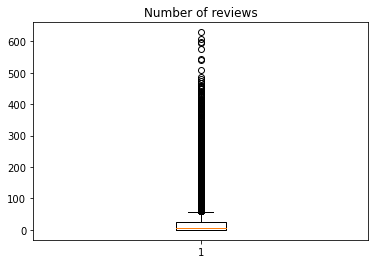

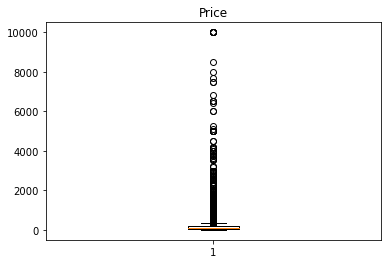

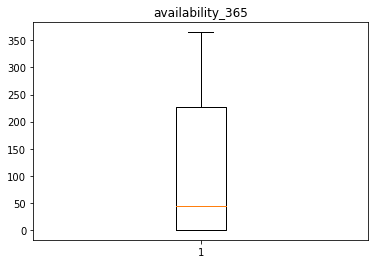

In [202]:
reviews = airbnb["number_of_reviews"].dropna()
plt.boxplot(airbnb["number_of_reviews"])
plt.title("Number of reviews")
plt.show()

price = airbnb["price"].dropna()
plt.boxplot(airbnb["price"])
plt.title("Price")
plt.show()

availability = airbnb["availability_365"].dropna()
plt.boxplot(airbnb["availability_365"])
plt.title("availability_365")
plt.show()


- describe what you expected to see with these features and what you actually observed 

[Response here]

In [ ]:
#I expected a nice looking boxplot for the price and # of reviews where the box would be visible,
#but instead it seems like there are a bunch of outliers instead.

#The availability however seemed to be distributed a bit more equally, hence the visible rectangle.

High variability in price with long tail values, review numbers much more compact, however availability has a wider variance.

### [10 pts] Plot average price of a listing per neighbourhood_group

Text(0.5, 1.0, 'Average Price of a Listing Per Neighborhood Group')

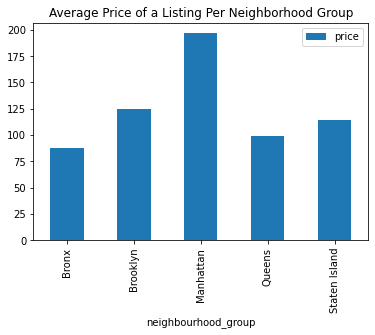

In [203]:
avg_by_neighborhood_group = airbnb.groupby("neighbourhood_group", as_index=False).mean()
avg_by_neighborhood_group.plot(kind = "bar", x = "neighbourhood_group", y = "price")
plt.title("Average Price of a Listing Per Neighborhood Group")

- describe what you expected to see with these features and what you actually observed 

[Response here]

In [ ]:
#I expected the avg price to be around the same across the neighborhood groups, but they vary a bit with Manhattan being the most expensive.

- So we can see different neighborhoods have dramatically different pricepoints, but how does the price breakdown by range. To see let's do a histogram of price by neighborhood to get a better sense of the distribution.

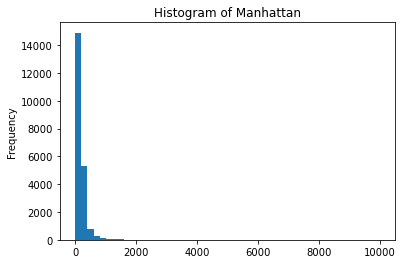

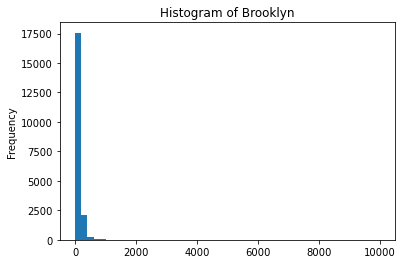

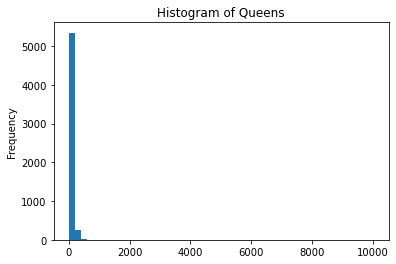

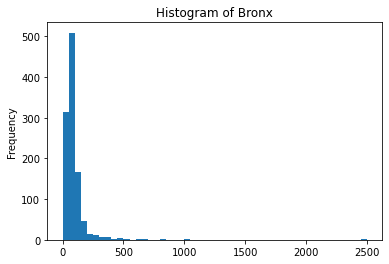

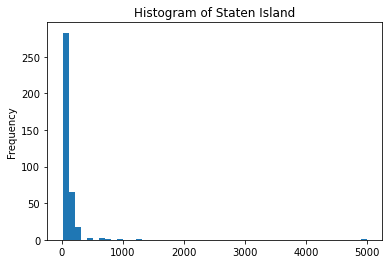

In [204]:
neighborhood_group_list = airbnb["neighbourhood_group"].value_counts().index.tolist()

for neighborhood in neighborhood_group_list: 
    #Get only speicifc neighborhood rows
    n_info = airbnb.loc[airbnb["neighbourhood_group"] == neighborhood]
    n_info["price"].plot(kind="hist", bins=50)
    plt.title("Histogram of " + neighborhood)
    plt.show()



### [5 pts] Plot map of airbnbs throughout New York (if it gets too crowded take a subset of the data, and try to make it look nice if you can :) ). 

<ipython-input-205-ac543081dc68>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(tick_values, fontsize=14)
No handles with labels found to put in legend.


Saving figure newyork_airbnb_prices_plot


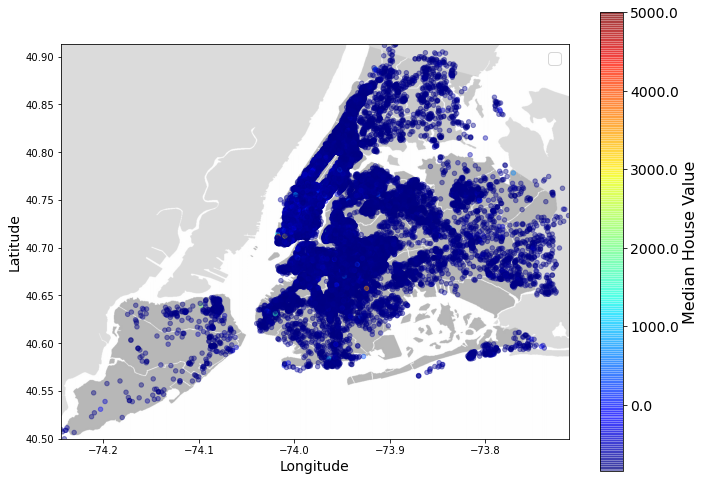

In [205]:
## here's a not so interestting way plotting it
#airbnb.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

# A more interesting plot is to color code (heatmap) the dots
# based on income. The code below achieves this

# load an image of california
images_path = os.path.join('./', "images")
os.makedirs(images_path, exist_ok=True)
filename = "newyork.png"

import matplotlib.image as mpimg
newyork_img=mpimg.imread(os.path.join(images_path, filename))
ax = airbnb.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       c="price", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )

# overlay the califronia map on the plotted scatter plot
# note: plt.imshow still refers to the most recent figure
# that hasn't been plotted yet.
lat_max = airbnb["latitude"].max()
lat_min = airbnb["latitude"].min()
long_max = airbnb["longitude"].max()
long_min = airbnb["longitude"].min()

plt.imshow(newyork_img, extent=[long_min, long_max, lat_min, lat_max], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# # setting up heatmap colors based on median_house_value feature
prices = airbnb["price"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cb = plt.colorbar()
cb.ax.set_yticklabels(tick_values, fontsize=14)
cb.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("newyork_airbnb_prices_plot")
plt.show()

### [5 pts] Plot average price of room types who have availability greater than 180 days and neighbourhood_group is Manhattan 

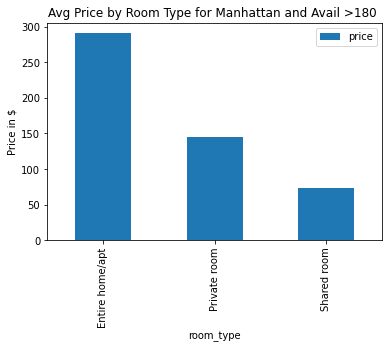

In [206]:
#For neigbhorhood_group == Manhattan and availability > 180
man = airbnb.loc[(airbnb["neighbourhood_group"] == "Manhattan") & (airbnb["availability_365"] > 180)]
avg_price = man.groupby("room_type", as_index=False).mean()
avg_price.plot(kind="bar", x="room_type", y="price")
plt.title("Avg Price by Room Type for Manhattan and Avail >180 ")
plt.ylabel("Price in $")
plt.show()

### [5 pts] Plot correlation matrix
- which features have positive correlation?
- which features have negative correlation?

In [207]:
#The features with positive correlation include # reviews vs. reviews per month
airbnb

#Most of the rest of the features have a negative correlation such as price vs # reviews, and # reviews vs host listing count

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [208]:
corr_matrix = airbnb.corr()

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='minimum_nights', ylabel='price'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='price'>,
        <AxesSubplot:xlabel='reviews_per_month', ylabel='price'>,
        <AxesSubplot:xlabel='calculated_host_listings_count', ylabel='price'>,
        <AxesSubplot:xlabel='availability_365', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='minimum_nights'>,
        <AxesSubplot:xlabel='minimum_nights', ylabel='minimum_nights'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='minimum_nights'>,
        <AxesSubplot:xlabel='reviews_per_month', ylabel='minimum_nights'>,
        <AxesSubplot:xlabel='calculated_host_listings_count', ylabel='minimum_nights'>,
        <AxesSubplot:xlabel='availability_365', ylabel='minimum_nights'>],
       [<AxesSubplot:xlabel='price', ylabel='number_of_reviews'>,
        <AxesSubplot:xlabel='minimum_nights', ylabel='number_of_reviews'>,
        <AxesSubp

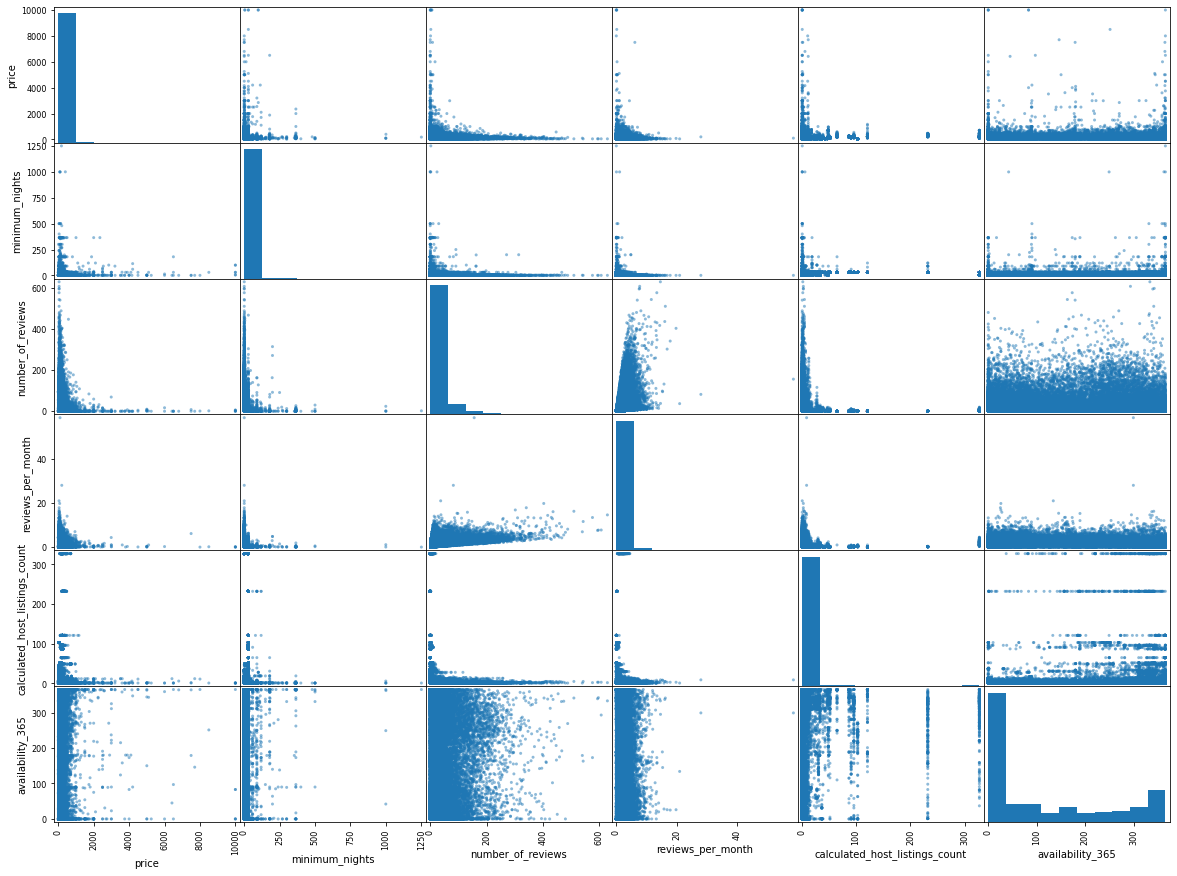

In [210]:
# the correlation matrix for different attributes/features can also be plotted
# some features may show a positive correlation/negative correlation or
# it may turn out to be completely random!
from pandas.plotting import scatter_matrix
attributes = ["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count",
              "availability_365"]
scatter_matrix(airbnb[attributes], figsize=(20, 15))
#save_fig("scatter_matrix_plot")


[Response here]

# [30 pts] Prepare the Data

### [5 pts] Augment the dataframe with two other features which you think would be useful

In [233]:
# housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
# housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
# housing["population_per_household"]=housing["population"]/housing["households"]

airbnb["reviews_per_min_nights"]  = airbnb["number_of_reviews"]/airbnb["minimum_nights"]
airbnb["months_with_reviews"] = airbnb["number_of_reviews"]/airbnb["reviews_per_month"]
airbnb["availability_per_min_nights"] = airbnb["availability_365"]/airbnb["minimum_nights"] 
airbnb

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_min_nights,months_with_reviews,availability_per_min_nights
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,9.0,42.857143,365.000000
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,45.0,118.421053,355.000000
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,0.0,NaN,121.666667
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,270.0,58.189655,194.000000
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,0.9,90.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9,0.0,NaN,4.500000
48891,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36,0.0,NaN,9.000000
48892,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27,0.0,NaN,2.700000
48893,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2,0.0,NaN,2.000000


### [5 pts] Impute any missing feature with a method of your choice, and briefly discuss why you chose this imputation method

In [235]:
# sample_incomplete_rows = airbnb[airbnb.isnull().any(axis=1)].head()
# sample_incomplete_rows
#Fill in reviews_per_month and months_with_reviews since they have NaN values
median = airbnb["reviews_per_month"].median() 
airbnb["reviews_per_month"].fillna(median, inplace=True) # option 3: replace na values with median values
airbnb["months_with_reviews"] = airbnb["number_of_reviews"]/airbnb["reviews_per_month"]
airbnb

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_min_nights,months_with_reviews,availability_per_min_nights
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,9.0,42.857143,365.000000
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,45.0,118.421053,355.000000
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,0.0,0.000000,121.666667
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,270.0,58.189655,194.000000
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,0.9,90.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.72,2,9,0.0,0.000000,4.500000
48891,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.72,2,36,0.0,0.000000,9.000000
48892,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.72,1,27,0.0,0.000000,2.700000
48893,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.72,6,2,0.0,0.000000,2.000000


### [15 pts] Code complete data pipeline using sklearn mixins

In [251]:
#WHAT WE WANT TO PREDICT
airbnb_unlabeled = airbnb.drop("price", axis=1) # drop labels for training set features
                                                       # the input to the model should not contain the true label
airbnb_labels = airbnb["price"].copy()

# This cell implements the complete pipeline for preparing the data
# using sklearns TransformerMixins
# Earlier we mentioned different types of features: categorical, and floats.
# In the case of floats we might want to convert them to categories.
# On the other hand categories in which are not already represented as integers must be mapped to integers before
# feeding to the model.

# Additionally, categorical values could either be represented as one-hot vectors or simple as normalized/unnormalized integers.
# Here we encode them using one hot vectors.

# DO NOT WORRY IF YOU DO NOT UNDERSTAND ALL THE STEPS OF THIS PIPELINE. CONCEPTS LIKE NORMALIZATION, 
# ONE-HOT ENCODING ETC. WILL ALL BE COVERED IN DISCUSSION

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin


imputer = SimpleImputer(strategy="median") # use median imputation for missing values
airbnb_num = airbnb_unlabeled.drop(["neighbourhood_group", "neighbourhood", "room_type"], axis=1) # remove the categorical feature

#Index values to be used in transform function
minimum_nights_ix = airbnb.columns.get_loc("minimum_nights")
reviews_per_month_ix = airbnb.columns.get_loc("reviews_per_month")
availability_365_ix = airbnb.columns.get_loc("availability_365")
number_of_reviews_ix = airbnb.columns.get_loc("number_of_reviews")
                                     
class AugmentFeatures(BaseEstimator, TransformerMixin):    
    '''
    implements the previous additional features we had defined
    airbnb["reviews_per_min_nights"]  = airbnb["number_of_reviews"]/airbnb["minimum_nights"]
    airbnb["months_with_reviews"] = airbnb["number_of_reviews"]/airbnb["reviews_per_month"]
    airbnb["availability_per_min_nights"] = airbnb["availability_365"]/airbnb["minimum_nights"] 
    '''
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        reviews_per_min_nights = X[:, number_of_reviews_ix] / X[:, minimum_nights_ix]
        availability_per_min_nights = X[:, availability_365_ix] / X[:, minimum_nights_ix]
        months_with_reviews = X[:, number_of_reviews_ix] / X[:, reviews_per_month_ix]
        
        return np.c_[X, reviews_per_min_nights, months_with_reviews, availability_per_min_nights]

attr_adder = AugmentFeatures()
housing_extra_attribs = attr_adder.transform(airbnb.values)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', AugmentFeatures()),
        ('std_scaler', StandardScaler()),
    ])

minimum_nights_ix = airbnb_num.columns.get_loc("minimum_nights")
reviews_per_month_ix = airbnb_num.columns.get_loc("reviews_per_month")
availability_365_ix = airbnb_num.columns.get_loc("availability_365")
number_of_reviews_ix = airbnb_num.columns.get_loc("number_of_reviews")

airbnb_num_tr = num_pipeline.fit_transform(airbnb_num)
numerical_features = list(airbnb_num)
categorical_features = ["neighbourhood_group", "neighbourhood", "room_type"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ])

airbnb_prepared = full_pipeline.fit_transform(airbnb_unlabeled)

### [5 pts] Set aside 20% of the data as test test (80% train, 20% test).

In [252]:
from sklearn.model_selection import train_test_split
data_target = airbnb['price']
train, test, target, target_test = train_test_split(airbnb_prepared, data_target, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train, target)

# let's try the full preprocessing pipeline on a few training instances
data = test
labels = target_test

print("Predictions:", lin_reg.predict(data)[:5])
print("Actual labels:", list(labels)[:5])

Predictions: [541.80947241 322.72308831 196.60284351  80.9170649  140.81134147]
Actual labels: [225, 649, 300, 26, 125]


# [15 pts] Fit a model of your choice

The task is to predict the price, you could refer to the housing example on how to train and evaluate your model using MSE.
Provide both test and train set MSE values.

In [253]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(test)
mse = mean_squared_error(target_test, preds)
rmse = np.sqrt(mse)
rmse

214.734006529798